In [ ]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [14]:
count = 0
import os
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/' +dir))
    print( dir +'Folder has'+ str(len(files))+ 'Images')
    count = count + len(files)
    print( 'Images Folder has'+ str(count)+ 'Images')
    

daisyFolder has764Images
Images Folder has764Images
dandelionFolder has1052Images
Images Folder has1816Images
roseFolder has785Images
Images Folder has2601Images
sunflowerFolder has733Images
Images Folder has3334Images
tulipFolder has984Images
Images Folder has4318Images


In [20]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [21]:
import numpy as np
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                        seed = 123,
                                                        validation_split=0.2,
                                                        subset = 'training',
                                                        batch_size=batch,
                                                        image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                      seed = 123,
                                                      validation_split=0.2,
                                                      subset = 'validation',
                                                      batch_size=batch,
                                                      image_size=(img_size,img_size))

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [22]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [23]:
import matplotlib.pyplot as plt

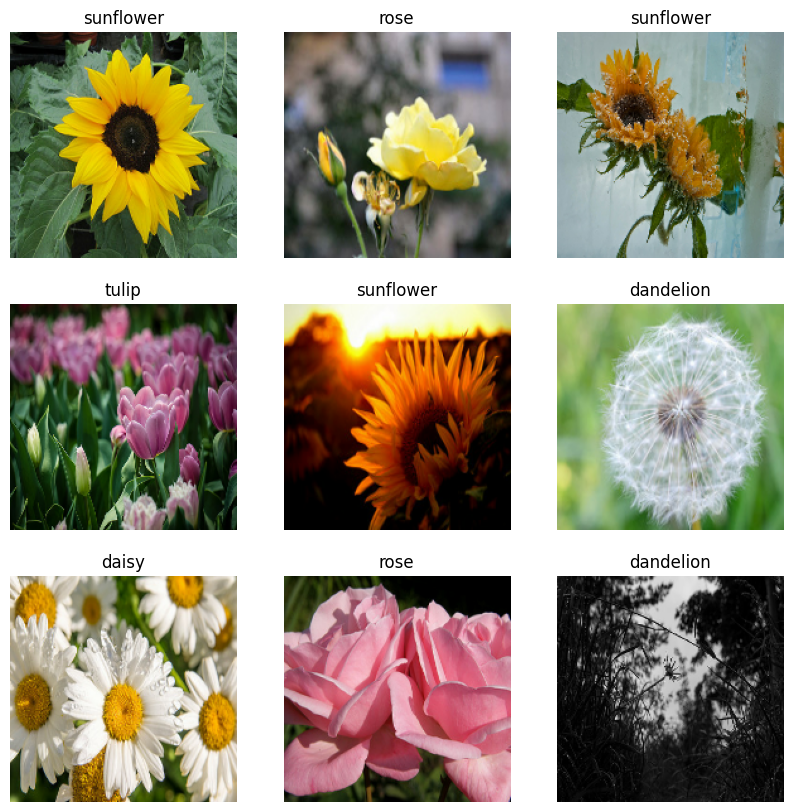

In [27]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

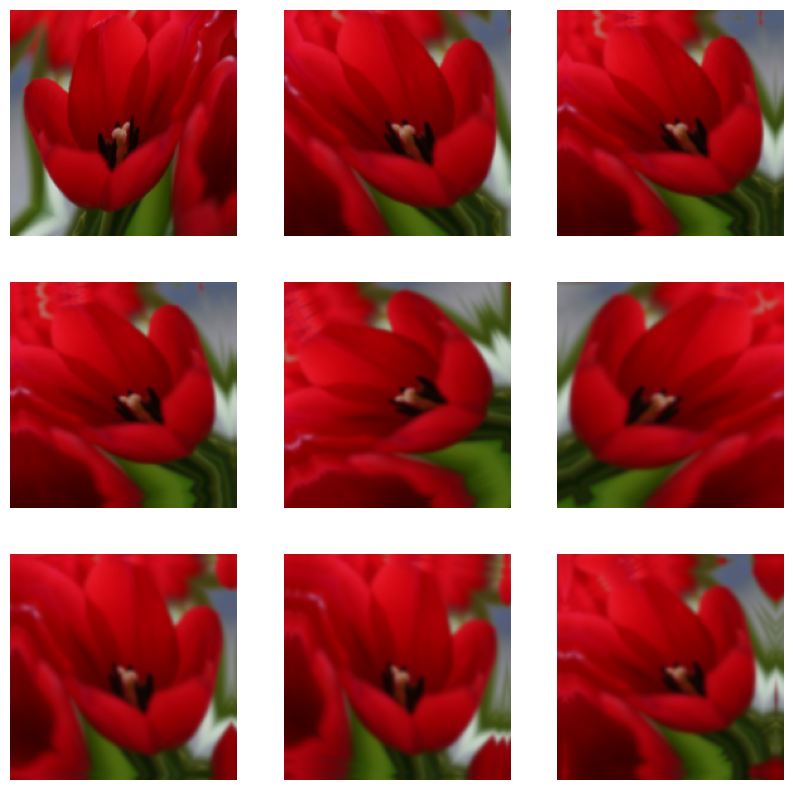

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [ ]:
#Model Creation

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_7 (Sequential)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [49]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 72s 626ms/step - accuracy: 0.4206 - loss: 1.3275 - val_accuracy: 0.5759 - val_loss: 1.0282
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 289ms/step - accuracy: 0.5918 - loss: 1.0273 - val_accuracy: 0.6153 - val_loss: 1.0088
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 314ms/step - accuracy: 0.6397 - loss: 0.8985 - val_accuracy: 0.6222 - val_loss: 0.9781
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - accuracy: 0.6762 - loss: 0.8478 - val_accuracy: 0.6640 - val_loss: 0.9048
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 310ms/step - accuracy: 0.6980 - loss: 0.7956 - val_accuracy: 0.6709 - val_loss: 0.8458
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.6931 - loss: 0.7880 - val_accuracy: 0.7010 - val_loss: 0.8482
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 320ms/step - accuracy: 0.7206 - loss: 0.7102 - val_accuracy: 0.6918 - val_loss: 0.8627
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 39s 365ms/step - accuracy: 0.7272 - loss: 0

In [54]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of ' + str(max(result) * 100)
    return outcome


In [55]:
classify_images('Sample/rose.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


'The Image belongs to rose with a score of tf.Tensor(82.14466, shape=(), dtype=float32)'

In [56]:
model.save('Flower_Recog_Model.h5')